In [39]:
import numpy as np
import pandas as pd
import sklearn as sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import pyreadstat
import statsmodels.api as sm

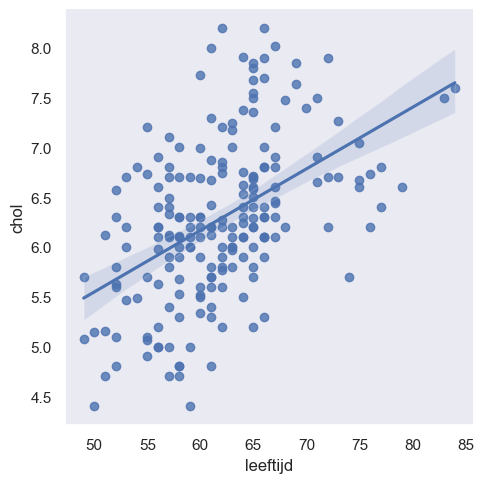

In [40]:
# Excercise 2.6.1
chol1 = (pyreadstat.read_sav('./voorbeeld7_1.sav'))[0]
#print(chol1.info())

sns.lmplot(data=chol1, x="leeftijd", y="chol",fit_reg=True)


In [45]:
# Excercise 2.6.2
X = sm.add_constant(chol1['leeftijd'])
y = chol1['chol']

model = sm.OLS(y, X)

fit1 = model.fit()
print(fit1.summary())

                            OLS Regression Results                            
Dep. Variable:                   chol   R-squared:                       0.236
Model:                            OLS   Adj. R-squared:                  0.232
Method:                 Least Squares   F-statistic:                     61.19
Date:                Mon, 11 Mar 2024   Prob (F-statistic):           3.04e-13
Time:                        16:05:25   Log-Likelihood:                -212.39
No. Observations:                 200   AIC:                             428.8
Df Residuals:                     198   BIC:                             435.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4584      0.492      5.002      0.0

In [44]:
# Excercise 2.6.3
X = sm.add_constant(chol1[['leeftijd', 'bmi', 'sekse', 'alcohol']])
y = chol1['chol']

model = sm.OLS(y, X)
fit2 = model.fit()
print(fit2.summary())

                            OLS Regression Results                            
Dep. Variable:                   chol   R-squared:                       0.396
Model:                            OLS   Adj. R-squared:                  0.383
Method:                 Least Squares   F-statistic:                     31.93
Date:                Mon, 11 Mar 2024   Prob (F-statistic):           1.83e-20
Time:                        16:05:21   Log-Likelihood:                -188.94
No. Observations:                 200   AIC:                             387.9
Df Residuals:                     195   BIC:                             404.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1829      0.609     -0.301      0.7

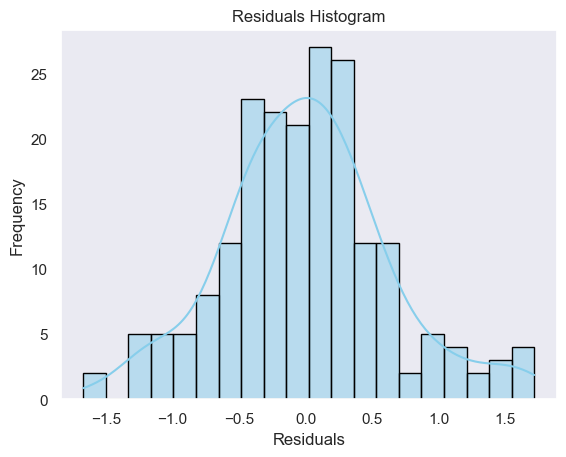

In [52]:
chol1['residuals'] = fit2.resid
plot = sns.histplot(chol1['residuals'], bins=20, kde=True, color='skyblue', edgecolor='black')
# As Seaborn is build on top of Mathplt we can use plt functions to make the renaming easy and without calling axises. 
plt.title('Residuals Histogram')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()